#### Instalacja wymaganych bibliotek:

pip install -r deps

#### Sekcja konnfiguracyjna

In [1]:
import os
import subprocess
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import table 

def mkdir(directory):
    try: 
        os.mkdir(directory)
    except:
        pass # print('Dir already exists.')
    
OUTPUTS_DIR = 'outputs'
PLOTS_DIR = 'plots'
INST_DIR = 'instances'
PLOTS_DIR = 'plots'
BINS_DIR = 'bin'
EV = 'ev'
GR = 'gr'

mkdir(OUTPUTS_DIR)
mkdir(PLOTS_DIR)
mkdir(INST_DIR)
mkdir(PLOTS_DIR)
mkdir(BINS_DIR)
mkdir('{}/{}'.format(OUTPUTS_DIR,EV))
mkdir('{}/{}'.format(OUTPUTS_DIR,GR))

FILE = "inst.txt"
PATH = os.path.abspath('')
INSTANCES = len(os.listdir('{}/{}'.format(PATH,INST_DIR)))

#### Generowanie instancji:

In [2]:
!python benchmarkGen.py {FILE}

#### Kompilowanie plików źródłowych:

In [3]:
if not (os.system("g++ -Wall -o bin/main src/main.cpp src/evolutional.cpp src/greedy.cpp")):
    print("Success")
else:
    print("Error")

Success


#### Uruchamianie algorytmu:

In [4]:
a = subprocess.run(['./bin/main'], capture_output=True)

#### Generowanie wykresów:

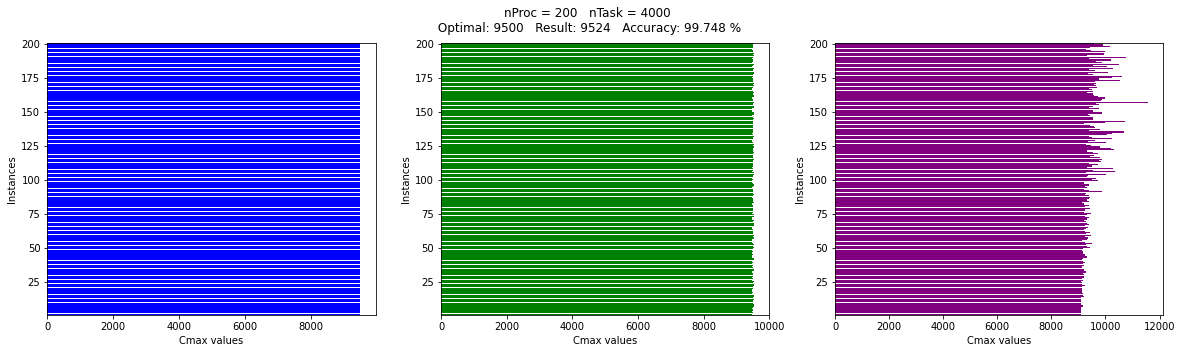

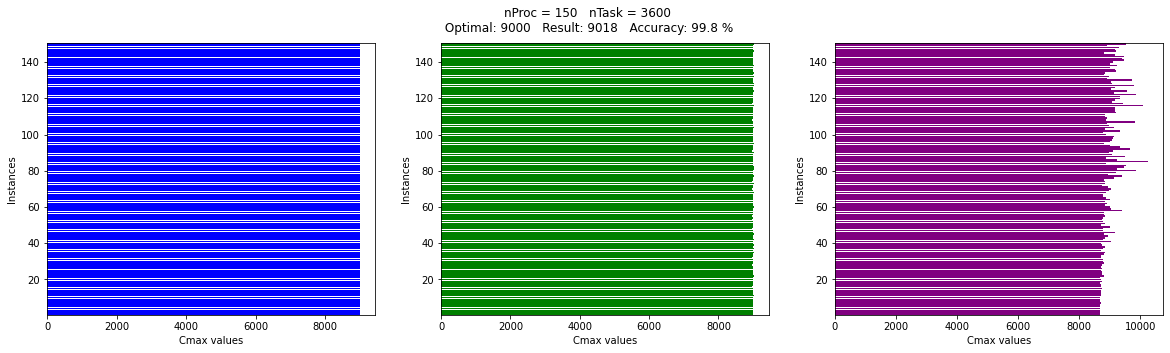

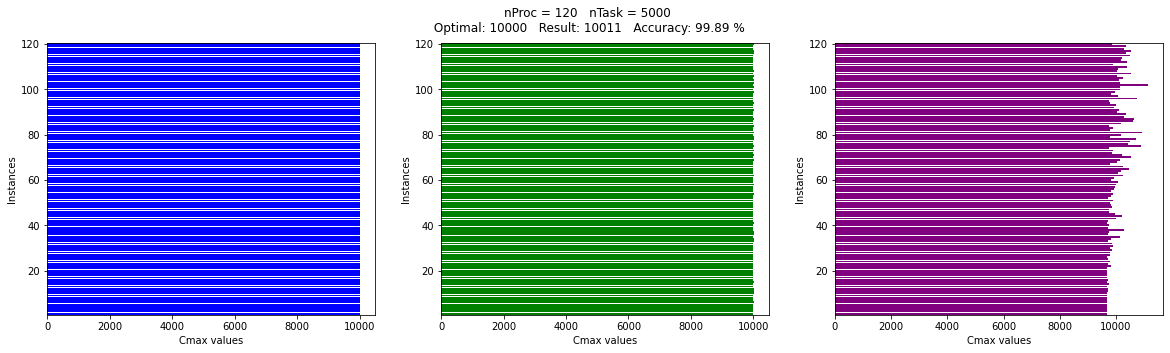

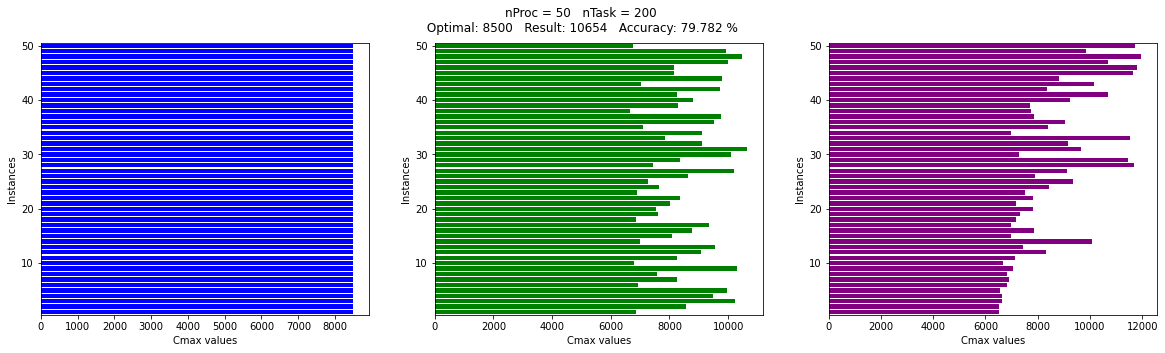

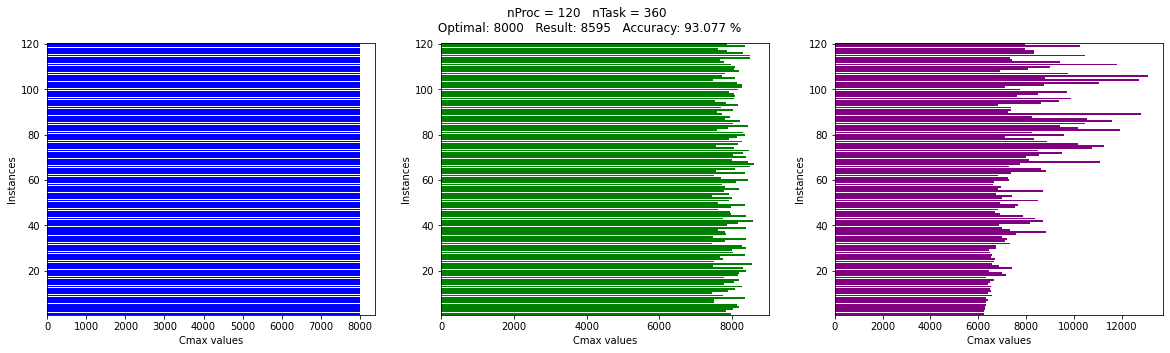

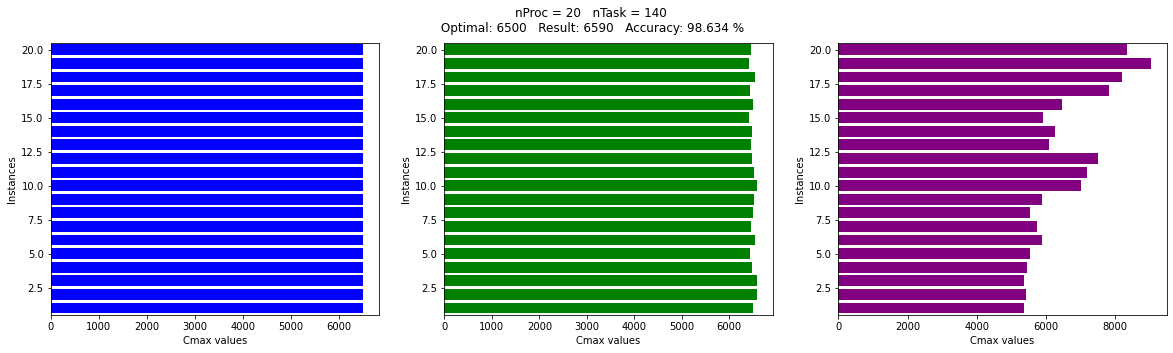

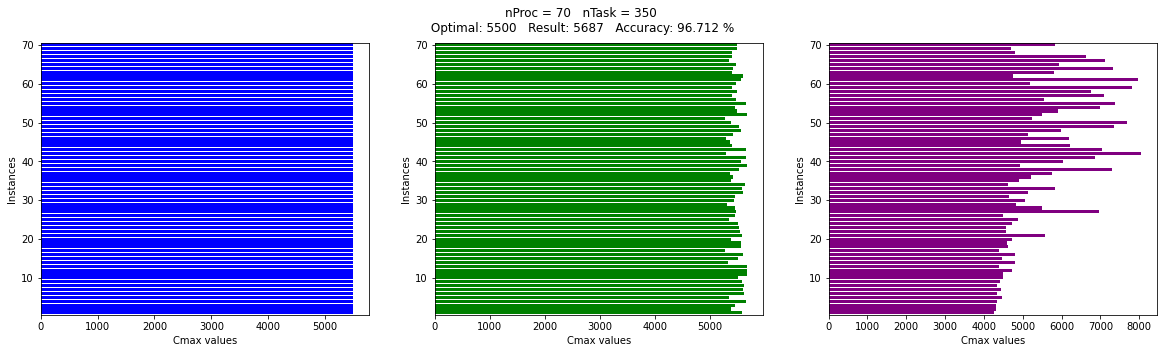

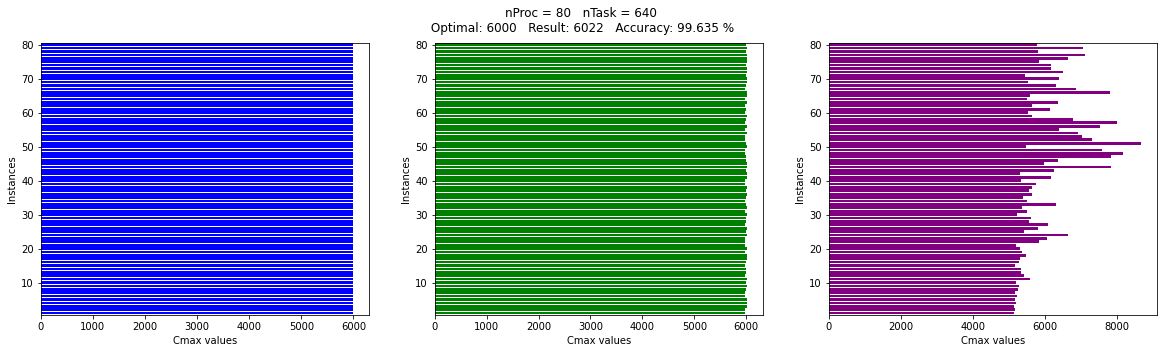

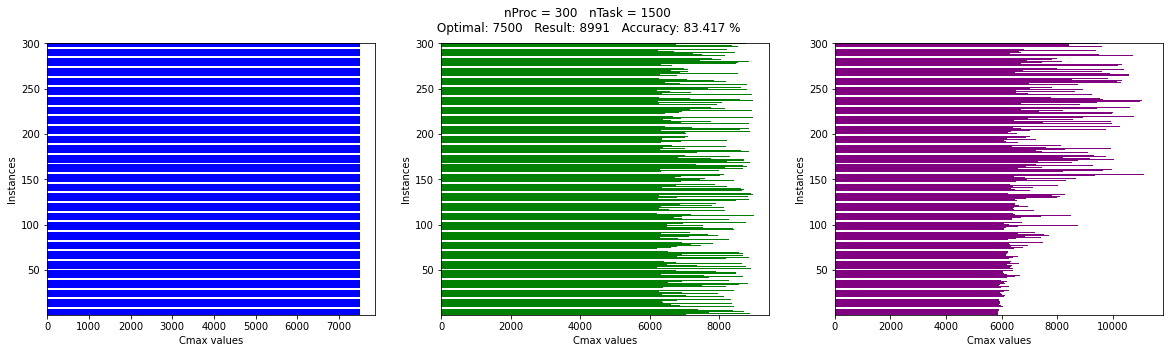

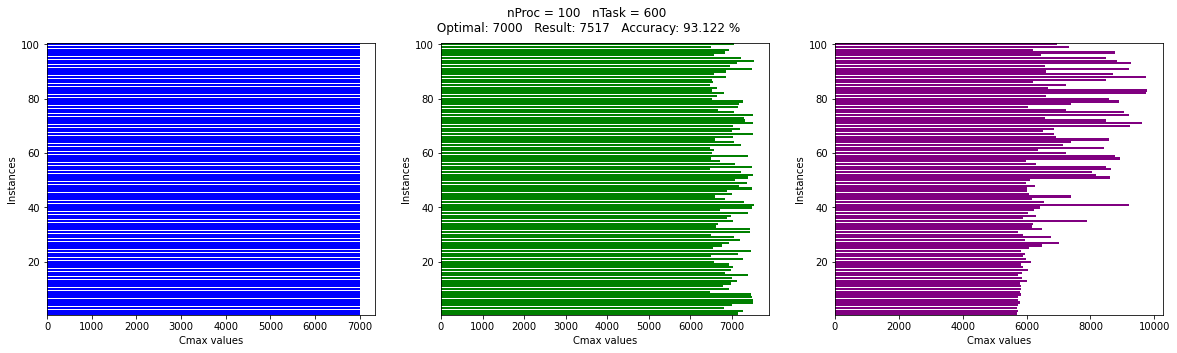

In [10]:
summary = []
performances = {'ev': [], 'gr': []}

def createSubPlot(ax, x, clr, max_val):
    ax.barh(y,x,color=clr)
    ax.set(ylim=(0.5,max_val+0.5))
    ax.set_xlabel('Cmax values')
    ax.set_ylabel('Instances')
    
        
for i in range(1,INSTANCES+1):
    ev = open('{}/ev/evolutional_{}'.format(OUTPUTS_DIR,i), 'r')
    Cmax = int(ev.readline())
    nProc = int(ev.readline()) 
    nTask = int(ev.readline())

    gr = open('{}/gr/greedy_{}'.format(OUTPUTS_DIR,i), 'r')
    _ = [gr.readline() for _ in range(3)] # Cmax, nProc, nTask    
    
    y = np.arange(1,nProc+1)
    x_opt = [Cmax for _ in range(nProc)] # optimal
    x_ev = [int(line) for line in ev.readlines()] # evolutional
    x_gr = [int(line) for line in gr.readlines()] # greedy
    ev.close()
    gr.close()
    
    ev_accuracy = round(Cmax / max(x_ev) * 100,3)
    gr_accuracy = round(Cmax / max(x_gr) * 100,3)
    
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    fig.suptitle("nProc = {}   nTask = {}\n Optimal: {}   Result: {}   Accuracy: {} %".format(nProc, nTask, Cmax, max(x_ev), ev_accuracy))

    createSubPlot(ax[0], x_opt, 'blue', nProc)
    createSubPlot(ax[1], x_ev, 'green', nProc)
    createSubPlot(ax[2], x_gr, 'purple', nProc)

    plt.savefig('{}/{}/plots_{}.svg'.format(PATH, PLOTS_DIR, i), transparent=False, facecolor='w')
    plt.show()
    
    summary.append([Cmax, max(x_ev), max(x_gr), ev_accuracy, gr_accuracy, nProc, nTask])


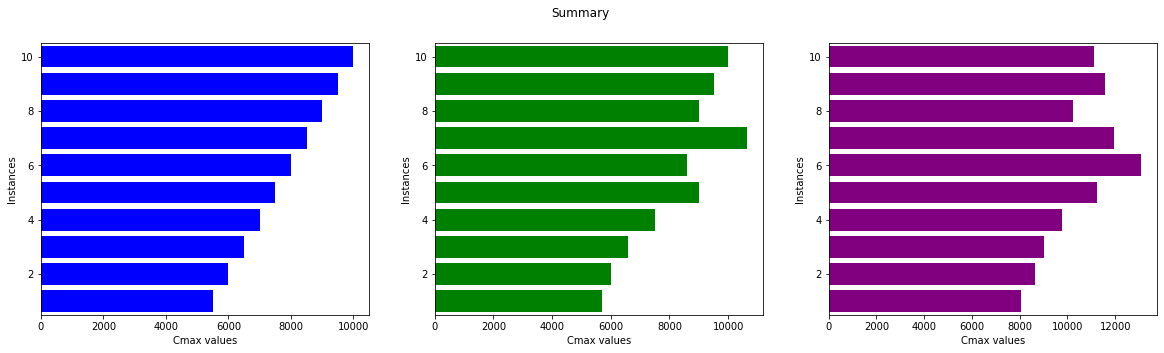

In [6]:
summary.sort(key=lambda x: x[0])
    
# podsumowanie wyników dla każdej instancji
y = np.arange(1,INSTANCES+1)
x_opt = [el[0] for el in summary]
x_ev = [el[1] for el in summary]
x_gr = [el[2] for el in summary]


fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle("Summary")
createSubPlot(ax[0], x_opt, 'blue', INSTANCES)
createSubPlot(ax[1], x_ev, 'green', INSTANCES)
createSubPlot(ax[2], x_gr, 'purple', INSTANCES)

plt.savefig('{}/{}/summary.svg'.format(PATH, PLOTS_DIR), transparent=False, facecolor='w')
plt.show()


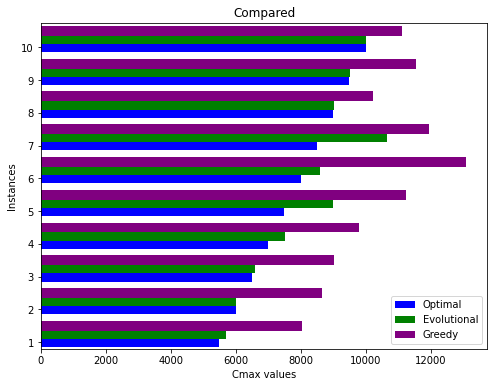

In [7]:
plt.figure(figsize=(8,6))
plt.ylim(0.8,INSTANCES+0.75)
plt.barh(y, x_opt, color='blue', height=0.3)
plt.barh(y+0.25, x_ev, color='green', height=0.3)
plt.barh(y+0.5, x_gr, color='purple', height=0.3)
plt.legend(["Optimal", "Evolutional", "Greedy"])
plt.title('Compared')
plt.xlabel('Cmax values')
plt.ylabel('Instances')
plt.yticks(y,y)
plt.savefig(PATH + '/plots/compared.svg', transparent=False, facecolor='w')
plt.show()

In [12]:
import dataframe_image as dfi

data = {'*CMax':[el[0] for el in summary],
        'Processes' : [el[5] for el in summary],
        'Tasks' : [el[6] for el in summary],
       'Greedy':[el[2] for el in summary],
       'Greedy Accuracy':[el[4] for el in summary],
       'Evolutional':[el[1] for el in summary],
       'Evolutional Accuracy':[el[3] for el in summary]}
df = pd.DataFrame(data)
df.index = np.arange(1, len(df)+1)

dfi.export(df,"{}/{}/data.svg".format(PATH,PLOTS_DIR))
dfi.export(df,"{}/{}/data.png".format(PATH,PLOTS_DIR))

df

[0112/203726.330591:ERROR:angle_platform_impl.cc(44)] Display.cpp:894 (initialize): ANGLE Display::initialize error 0: Internal Vulkan error (-3): Initialization of an object could not be completed for implementation-specific reasons, in ../../third_party/angle/src/libANGLE/renderer/vulkan/RendererVk.cpp, initialize:1048.
[0112/203726.330844:ERROR:gl_surface_egl.cc(782)] EGL Driver message (Critical) eglInitialize: Internal Vulkan error (-3): Initialization of an object could not be completed for implementation-specific reasons, in ../../third_party/angle/src/libANGLE/renderer/vulkan/RendererVk.cpp, initialize:1048.
[0112/203726.330920:ERROR:gl_surface_egl.cc(1382)] eglInitialize SwANGLE failed with error EGL_NOT_INITIALIZED
[0112/203726.330969:ERROR:gl_ozone_egl.cc(20)] GLSurfaceEGL::InitializeOneOff failed.
[0112/203726.333670:ERROR:viz_main_impl.cc(161)] Exiting GPU process due to errors during initialization
[0112/203726.349165:ERROR:gpu_init.cc(457)] Passthrough is not supported, 

,*CMax,Processes,Tasks,Greedy,Greedy Accuracy,Evolutional,Evolutional Accuracy
1,9500,200,4000,11563,82.159,9524,99.748
2,9000,150,3600,10235,87.934,9018,99.800
3,10000,120,5000,11129,89.855,10011,99.890
4,8500,50,200,11962,71.058,10654,79.782
5,8000,120,360,13091,61.111,8595,93.077
6,6500,20,140,9037,71.927,6590,98.634
7,5500,70,350,8050,68.323,5687,96.712
8,6000,80,640,8662,69.268,6022,99.635
9,7500,300,1500,11258,66.619,8991,83.417
10,7000,100,600,9783,71.553,7517,93.122
